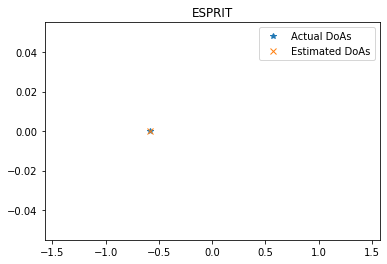

In [7]:
import numpy as np
import numpy.linalg as LA
from matplotlib import pyplot as plt

def esprit(CovMat,L,N):
    # CovMat is the signal covariance matrix, L is the number of sources, N is the number of antennas
    _,U = LA.eig(CovMat)
    S = U[:,0:L]
    Phi = LA.pinv(S[0:N-1]) @ S[1:N] # the original array is divided into two subarrays [0,1,...,N-2] and [1,2,...,N-1]
    eigs,_ = LA.eig(Phi)
    DoAsESPRIT = np.arcsin(np.angle(eigs)/np.pi)
    return DoAsESPRIT

def array_response_vector(array,theta):
    N = array.shape
    v = np.exp(1j*2*np.pi*array*np.sin(theta))
    return (v/np.sqrt(N))

L = 1  # number of sources
N = 2048  # number of ULA elements 
snr = 30 # signal to noise ratio
numrealization = 1 # number of realizations

array = np.linspace(0,(N-1)/2,N)

Thetas = np.pi*(np.random.rand(L)-1/2)   # random source directions
Alphas = np.random.randn(L) + np.random.randn(L)*1j # random source powers
Alphas = np.sqrt(1/2)*Alphas

H = np.zeros((N,numrealization)) + 1j*np.zeros((N,numrealization))

for iter in range(numrealization):
    htmp = np.zeros(N)
    for i in range(L):
        pha = np.exp(1j*2*np.pi*np.random.rand(1))
        htmp = htmp + pha*Alphas[i]*array_response_vector(array,Thetas[i])
    wgn = 0 #np.sqrt(0.5/snr)*(np.random.randn(N)+np.random.randn(N)*1j)
    H[:,iter] = htmp + wgn
CovMat = H@H.conj().transpose()

DoAsESPRIT = esprit(CovMat,L,N)

plt.figure(0)
plt.plot(Thetas,np.zeros(L),'*')
plt.plot(DoAsESPRIT,np.zeros(L),'x')
plt.xlim([-np.pi/2, np.pi/2])
plt.title('ESPRIT')
plt.legend(['Actual DoAs','Estimated DoAs'])

Text(0, 0.5, 'Time')

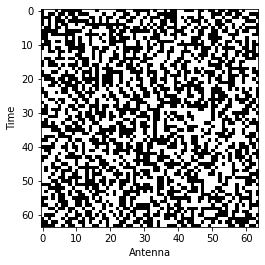

In [53]:
plt.imshow(np.sign(H.real).astype(np.uint8).T, cmap='binary')
plt.xlabel('Antenna')
plt.ylabel('Time')

Text(0, 0.5, 'Time')

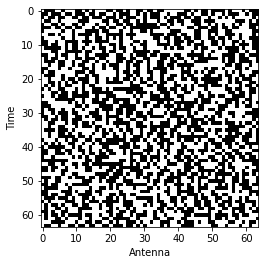

In [54]:
plt.imshow(np.sign(H.imag).astype(np.uint8).T, cmap='binary')
plt.xlabel('Antenna')
plt.ylabel('Time')